# Late repayment predict model

### Data source: Kaggle： https://www.kaggle.com/c/GiveMeSomeCredit/overview

### Import libraries

In [42]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

### Import data

In [43]:
train = pd.read_csv('cs-training.csv')

In [44]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [45]:
train.drop(columns=["Unnamed: 0"], inplace=True)

### EDA

In [46]:
train.shape

(150000, 11)

#### Missing values

In [47]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

#### Duplicated values

In [48]:
train.duplicated().sum()

609

#### Distibution

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

#### Covariance

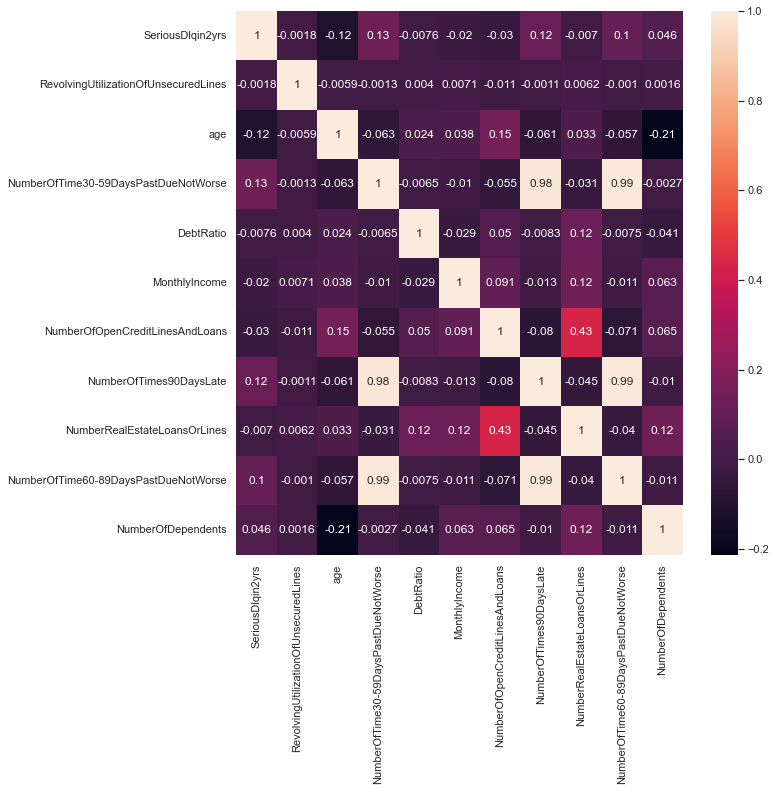

In [50]:
cor=train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, ax=ax);

## Data Cleaning

In [51]:
train_clean = train.copy()

In [52]:
# drop duplicates
train_clean.drop_duplicates(inplace=True)

#### fillna with median

In [53]:
def fill_na(df):
    na_list = [i for i in df.isnull().sum().index if df.isnull().sum()[i] > 0]
    for n in na_list:
        train_fillna = train_clean[n][train_clean[n].isna() == False]
        train_clean[n].fillna(train_fillna.median(), inplace=True)

In [54]:
fill_na(train_clean)
train_clean.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### distribution in age

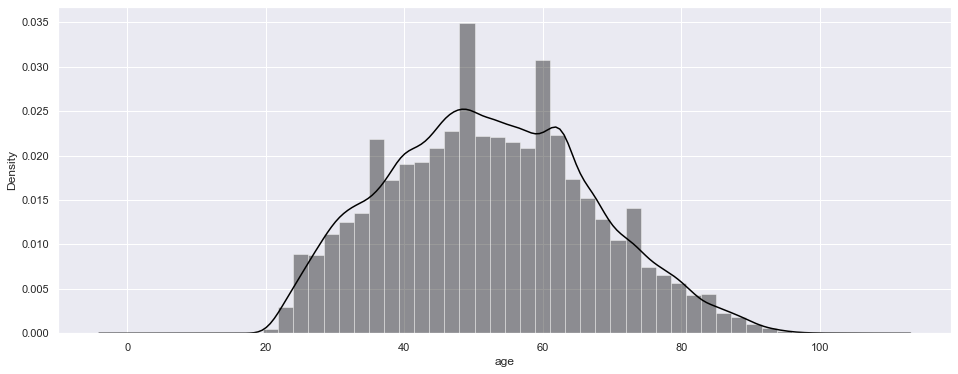

In [55]:
plt.figure(figsize=(16, 6))
sns.distplot(train_clean["age"], color = "black");

#### Creater new column "age_label for "Binning - Age

In [56]:
train_clean["age_label"] = pd.cut(train_clean["age"], np.arange(20, 110, 10))

In [57]:
train_clean.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_label
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40, 50]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(30, 40]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(30, 40]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(20, 30]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40, 50]"


#### regrouping - Combining subgroups with too small samples or too close default rates

In [58]:
bins = [0, 30, 40, 50, 60, 70, 110]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
train_clean['age_grouped'] = pd.cut(train_clean['age'], bins, right=0, labels=labels)
train_clean.drop(columns="age", inplace=True)

In [59]:
def plot_age(col, fun):
    data = pd.concat([train_clean[col], train_clean["age_label"]], axis = 1)
    if fun == "s":
        df = data.groupby("age_label")[col].sum()
    elif fun == "m":
        df = data.groupby("age_label")[col].mean()

    df.plot(kind="bar", figsize=(16, 6))

#### Age and RevolvingUtilizationOfUnsecuredLines relationship

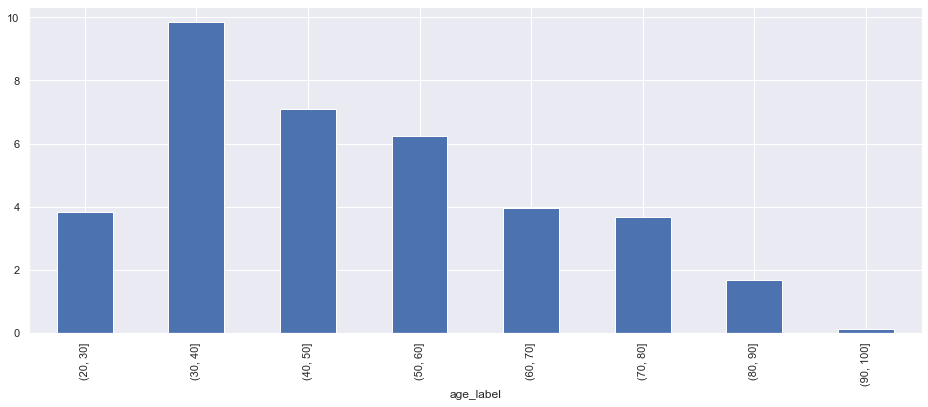

In [60]:
plot_age("RevolvingUtilizationOfUnsecuredLines", "m");

#### RevolvingUtilizationOfUnsecuredLines discretization

In [61]:
bins = [0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05,
        train_clean['RevolvingUtilizationOfUnsecuredLines'].max()*1.05]
labels = [
    '0-0.15',
    '0.15-0.30',
    '0.30-0.45',
    '0.45-0.60',
    '0.60-0.75',
    '0.75-0.90',
    '0.90-1.05',
    '1.05+']

train_clean['ru_grouped'] = pd.cut(train_clean['RevolvingUtilizationOfUnsecuredLines'],
                                   bins, right=0, labels=labels)

In [62]:
train_clean.drop(columns='ru_grouped', inplace=True)

#### Outliers in DebitRatio

<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

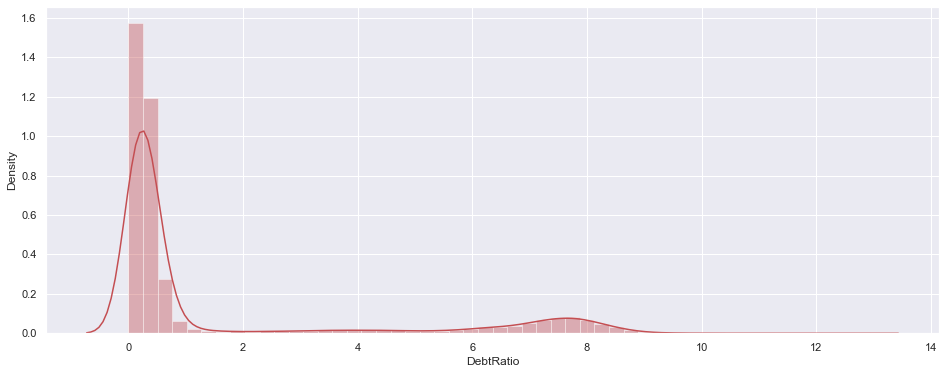

In [63]:
plt.figure(figsize=(16, 6))
sns.distplot(train_clean['DebtRatio'].apply(np.log1p), color="r")

#### Normalization

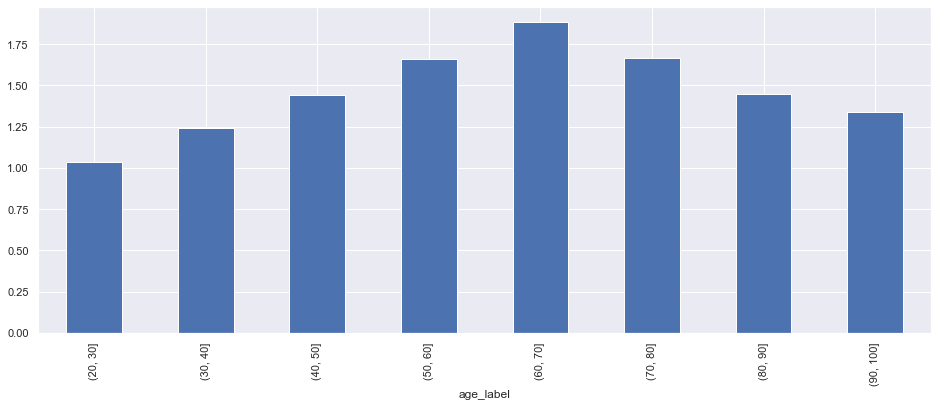

In [64]:
train_clean["dr_log"] = train_clean["DebtRatio"].apply(np.log1p)
train_clean.drop(columns="DebtRatio", inplace=True)
plot_age("dr_log", "m")

#### NumberOfOpenCreditLinesAndLoans Discretization

In [65]:
bins = [0, 2, 4, 6, 10, 14,
       train_clean['NumberOfOpenCreditLinesAndLoans'].max()*1.05]
labels = ['0-1', '2-3', '4-5', '6-9', '10-13', '14+']
train_clean['num_oc_grouped'] = pd.cut(train_clean['NumberOfOpenCreditLinesAndLoans'], \
                                       bins, right=0, labels=labels)
train_clean.drop(columns='NumberOfOpenCreditLinesAndLoans', inplace=True)

#### NumberOfDependents Discretization

In [66]:
bins = [0, 1, 2, 4, 
       train_clean['NumberOfDependents'].max()*1.05]
labels = ['0', '1', '2-3', '4+']
train_clean['num_dep_grouped'] = pd.cut(train_clean['NumberOfDependents'], \
                                        bins, right=0, labels=labels)
train_clean.drop(columns='num_dep_grouped', inplace=True)

#### Number of late payments in the past 2 years

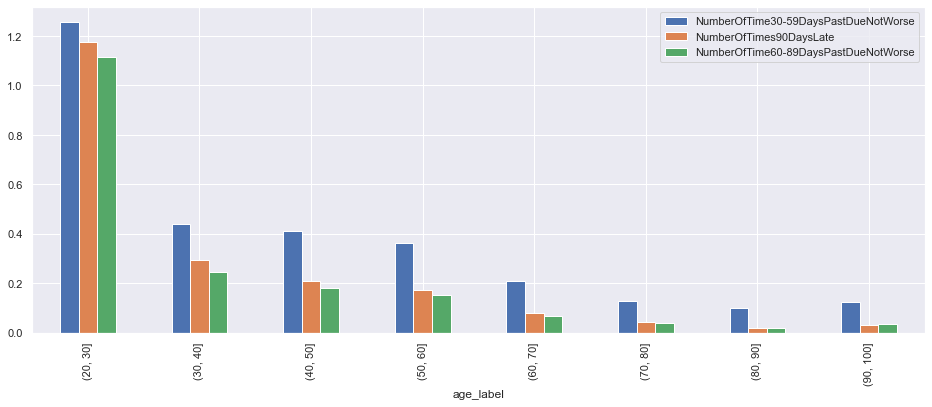

In [67]:
PastDueNotWorse = [i for i in train_clean.columns if "NumberOfTime" in i]
plot_age(PastDueNotWorse, fun = "m")

#### Verify the clear linear relationship seen in the heat map

In [68]:
cor = train_clean[PastDueNotWorse].corr()
cor

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse,1.000000,0.980489,0.984535
NumberOfTimes90DaysLate,0.980489,1.000000,0.991409
NumberOfTime60-89DaysPastDueNotWorse,0.984535,0.991409,1.000000


In [69]:
# remain one column
train_clean.drop(columns=["NumberOfTime30-59DaysPastDueNotWorse", \
                          "NumberOfTime60-89DaysPastDueNotWorse"], inplace=True)

#### Late payment and Age

<AxesSubplot:xlabel='age_label', ylabel='count'>

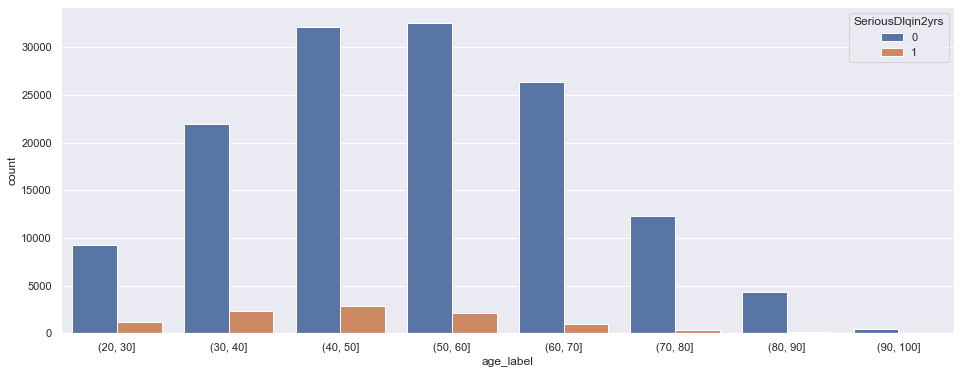

In [70]:
plt.figure(figsize=(16, 6))
sns.countplot(data=train_clean, x="age_label", hue="SeriousDlqin2yrs")

In [71]:
# Normalization for late payemnt
train_clean['income_log'] = (train_clean['MonthlyIncome']/10000).apply(np.log1p)
train_clean.drop(columns=['MonthlyIncome','age_label'], inplace=True)

## Train Model

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

### LogisticRegreesion

In [73]:
attributes = train_clean.columns.drop(['SeriousDlqin2yrs'])
sol = ['SeriousDlqin2yrs']
df = pd.get_dummies(train_clean, drop_first=True)
X = pd.get_dummies(train_clean[attributes], drop_first=True)
y = train_clean[sol]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, shuffle=True)

In [74]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,dr_log,income_log,age_grouped_30-39,age_grouped_40-49,age_grouped_50-59,age_grouped_60-69,age_grouped_70+,num_oc_grouped_2-3,num_oc_grouped_4-5,num_oc_grouped_6-9,num_oc_grouped_10-13,num_oc_grouped_14+
91748,0.143109,0,1,0.0,0.736516,0.371564,1,0,0,0,0,1,0,0,0,0
123249,0.970904,0,2,1.0,0.604837,0.384582,0,1,0,0,0,0,0,0,1,0
108274,0.998148,0,3,3.0,0.512537,0.544647,0,0,1,0,0,0,0,1,0,0
97892,0.872222,0,2,0.0,0.352016,0.562469,0,0,1,0,0,0,1,0,0,0
65577,1.000000,98,0,0.0,0.000000,0.262364,0,0,0,0,0,0,0,0,0,0


In [75]:
# get score function
def plot_est_score(Range):
    score_list = pd.DataFrame({}, index=np.arange(
        Range.shape[0]+1), columns=[["train_score", "test_score"]])
    for i in Range:
        lg = LogisticRegression(C=i, solver='lbfgs')
        pred = lg.fit(X_train, y_train).predict(X_valid)
        ascore = lg.score(X_train, y_train)
        fscore = lg.score(X_valid, y_valid)
        score_list.loc[i-1, "train_score"] = ascore
        score_list.loc[i-1, "test_score"] = fscore
    score_list.dropna(inplace=True)
    score_max = score_list.max()
    score_max_index = score_list[score_list == score_list.max()].dropna().index[0]
    print(
        "C={}\nmax =\n{}".format(
            score_max_index+1,
            score_max))
    score_list.plot(figsize=(16, 4))

C=0.010000000000000009
max =
train_score    0.933347
test_score     0.933223
dtype: object


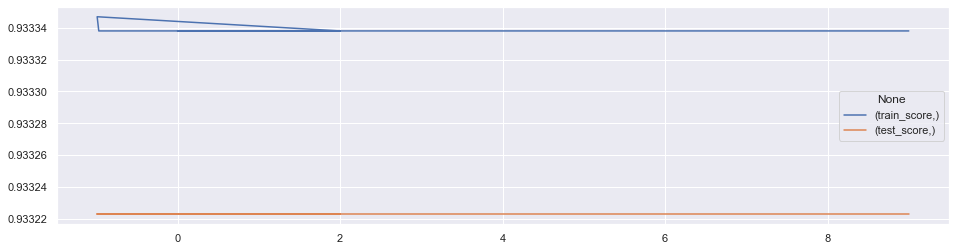

In [76]:
plot_est_score(np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10]))

#### GrivSearch for best C & solver

In [77]:
params_LR = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
            'solver': ['lbfgs', 'liblinear']}
gs = GridSearchCV(LogisticRegression(max_iter=1000), 
                  param_grid = params_LR,
                  scoring = 'f1',
                  cv=5).fit(X_train, y_train)
gs.best_params_

{'C': 0.01, 'solver': 'lbfgs'}

#### Get Prediction on validation data

In [78]:
model_lr = LogisticRegression(C=gs.best_params_['C'], solver=gs.best_params_['solver']).fit(X_train, y_train)
print('train Score: %.6f' % model_lr.score(X_train, y_train))
print('valid Score: %.6f' %  model_lr.score(X_valid, y_valid))

train Score: 0.933347
valid Score: 0.933223


In [79]:
model_lr.coef_.T.ravel()

array([-1.47335013e-04,  3.80907959e-02,  3.91859430e-02,  9.61872240e-02,
       -1.44851315e-02, -7.64242174e-01,  2.14744671e-01,  4.31263996e-02,
       -1.71717463e-01, -7.02199091e-01, -9.42422212e-01, -1.68468379e-01,
       -3.99915835e-01, -5.73899026e-01, -4.48835884e-01, -2.11199533e-01])

In [82]:
coeff = pd.DataFrame([X_train.columns.tolist(),  model_lr.coef_.T.ravel()]).T
coeff

,0,1
0,RevolvingUtilizationOfUnsecuredLines,-0.000147
1,NumberOfTimes90DaysLate,0.038091
2,NumberRealEstateLoansOrLines,0.039186
3,NumberOfDependents,0.096187
4,dr_log,-0.014485
5,income_log,-0.764242
6,age_grouped_30-39,0.214745
7,age_grouped_40-49,0.043126
8,age_grouped_50-59,-0.171717
9,age_grouped_60-69,-0.702199


#### Most important features

In [83]:
coeff.columns = ['features','coef']
coeff.sort_values(by='coef') 

,features,coef
10,age_grouped_70+,-0.942422
5,income_log,-0.764242
9,age_grouped_60-69,-0.702199
13,num_oc_grouped_6-9,-0.573899
14,num_oc_grouped_10-13,-0.448836
12,num_oc_grouped_4-5,-0.399916
15,num_oc_grouped_14+,-0.2112
8,age_grouped_50-59,-0.171717
11,num_oc_grouped_2-3,-0.168468
4,dr_log,-0.014485


#### Findings

In [ ]:
#The FEATURES that contributed most to the model are: 
#    income, age, and whether there have other outstanding debts.

## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#### Plotting the learning curve

0.9332222174879025 121


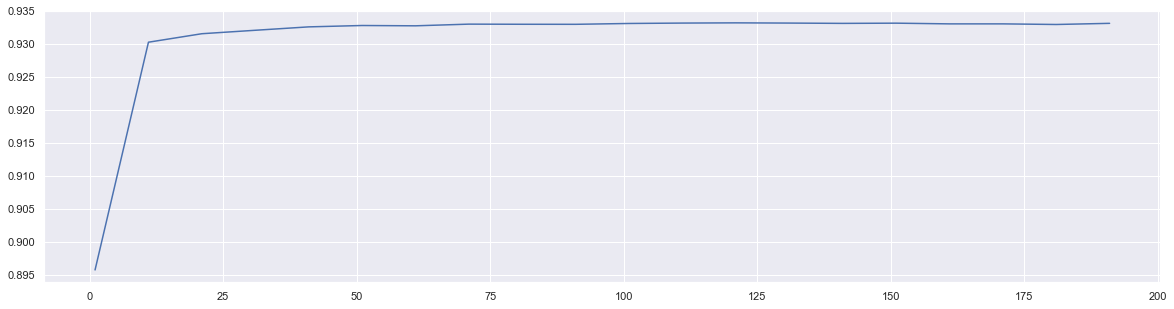

In [94]:
score_l=[]
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,X,y,cv=5).mean()
    score_l.append(score)
print(max(score_l),(score_l.index(max(score_l))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score_l)
plt.show()

In [96]:
rfc = RandomForestClassifier().fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_valid, y_valid))

0.9992949135599725
0.9323658562707507


0.9359733890746498 10


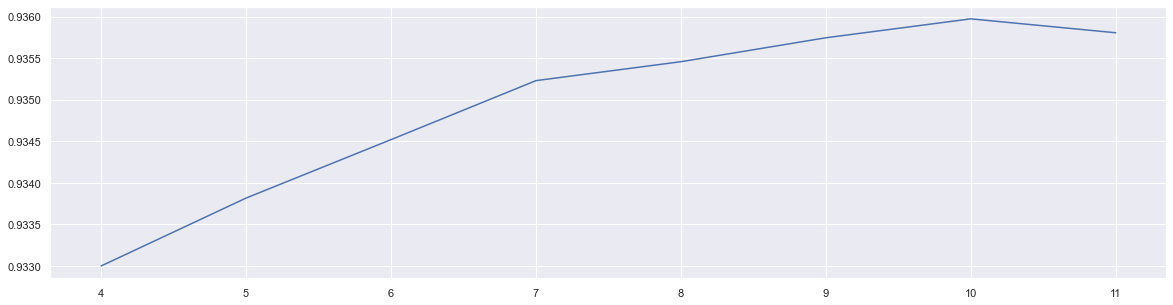

In [104]:
scorel = []
for i in range(4,12):
    rfc = RandomForestClassifier(n_estimators=65
                                 ,n_jobs=-1
                                 ,max_depth=i
                                 ,random_state=90)
    score = cross_val_score(rfc,X,y,cv=5).mean()
    scorel.append(score)
print(max(scorel),([*range(4,12)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(4,12),scorel)
plt.show()

#### Get Prediction score

In [120]:
rfc = RandomForestClassifier(n_estimators=800
                                 ,n_jobs=-1
                                 ,max_depth=10).fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_valid, y_valid))

0.9421025856144516
0.935204026989397


In [121]:
rfc.feature_importances_

array([0.30804147, 0.43473917, 0.03049851, 0.02156154, 0.07782595,
       0.06337026, 0.00665507, 0.00496546, 0.00472757, 0.01071924,
       0.00972349, 0.00483939, 0.00436287, 0.00533811, 0.00567672,
       0.00695516])

In [123]:
rfc.n_features_in_

16